In [1]:
import cPickle
import numpy
import gzip
import os
import sys
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
fIn = gzip.open("../../out/MPC/00/data/DATA__p-000-098_thres_00_a23_k15_step-by-step_t-10.dat", "rb")
DATA = cPickle.load(fIn)
fIn.close()

In [3]:
new_data = {}

In [4]:
DATA.keys()

['TOT', 'ACT']

In [11]:
DATA["ACT"].keys()

['Pw',
 'P_N_A',
 'Nshots',
 'Njumps',
 'P_N_K',
 'n_a_t',
 'Pk',
 'k_a_t',
 'P_akt',
 'Bins']

In [15]:
DATA["ACT"]["Bins"]["kk"][6]

array([   1.        ,    1.39160131,    1.9365542 ,    2.69491136,
          3.75024217,    5.2188419 ,    7.26254721,   10.1065702 ,
         14.0643163 ,   19.57192096,   27.23631079,   37.90208571,
         52.74459203,   73.39944323,  102.14276117,  142.142     ])

In [9]:
DATA["ACT"]["P_N_A"][8][8][8].keys()

['s_new', 's_eve']

In [16]:
# Pna for free
new_data["ACT"] = {"P_N_A": DATA["ACT"]["P_N_A"],
                  "Bins": DATA["ACT"]["Bins"]}

In [21]:
# NAK
print DATA["TOT"]["N_A_K"][6][10]#.keys()

71


In [22]:
new_data["TOT"] = {"N_A_K": DATA["TOT"]["N_A_K"]}

In [23]:
fOut = gzip.open("../../out/MPC/00/data/DATA_PN.dat", "wb")
DATA = cPickle.dump(new_data, fOut)
fOut.close()

# Here we check the consistency of the new importer with the old one for what concerns the P(a,k,t)

In [34]:
%pylab inline
import gzip
import cPickle
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from my_foos import Lin_Log_Bins

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [35]:
with gzip.open("/home/ubi/DATA_PhD/TVN-ST/py/out/Calcolo/Auto_bins/TWT/00/data/DATA__p-000-273_thres_00_a22_k11_my-def_t-10_.dat", "rb") as fOld:
    dataOld = cPickle.load(fOld)
    
with gzip.open("/home/ubi/PhD/TVN/strong_ties/out/Prova_new_importer_TWT/00/data/DATA__p-000-273_thres_00_a21_actbin_integrated_tfil_tsmp-50_bins122.dat", "rb") as fNew:
    dataNew = cPickle.load(fNew)

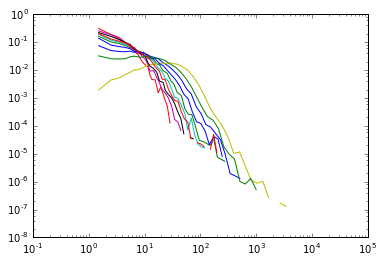

In [44]:
#print dataOld["ACT"]["P_akt"][12][273]["bb"]
#print dataOld["ACT"]["P_akt"][12][273]["kk"]

act = 12

for time in dataOld["ACT"]["P_akt"][act].keys():
    plt.loglog(dataOld["ACT"]["P_akt"][act][time]["bb"][1:], dataOld["ACT"]["P_akt"][act][time]["kk"])

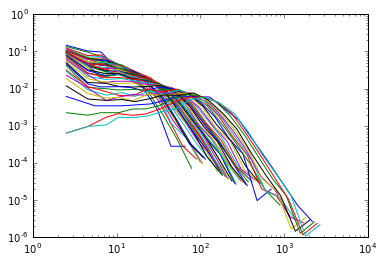

In [43]:
#print dataNew["ACT"]["P_akt"][12][45]["k"]
#print dataNew["ACT"]["P_akt"][12][45]["n"]

act = 15

for time in dataNew["ACT"]["P_akt"][act].keys():

    X, Y = dataNew["ACT"]["P_akt"][act][time]["k"], dataNew["ACT"]["P_akt"][act][time]["n"]

    f, b = np.histogram(X, weights=Y, bins=Lin_Log_Bins(1., max(X)+1.), density=True)
    plt.loglog(b[1:], f, '-')


In [41]:
Lin_Log_Bins(1., max(X)+1.)

array([  5.00000000e-01,   2.50000000e+00,   4.50000000e+00,
         7.50000000e+00,   1.05000000e+01,   1.65000000e+01,
         2.45000000e+01,   3.55000000e+01,   5.35000000e+01,
         7.95000000e+01,   1.18500000e+02,   1.75500000e+02,
         2.61500000e+02,   3.89500000e+02,   5.79500000e+02,
         8.63500000e+02,   1.28450000e+03,   1.91250000e+03,
         2.84550000e+03,   4.23550000e+03,   6.30450000e+03])